In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement_table = Base.classes.measurement
station_table = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
first_date = session.query(measurement_table.date).order_by(measurement_table.date.desc()).first()
print(f'The most recent date is: {first_date}.')

The most recent date is: ('2017-08-23',).


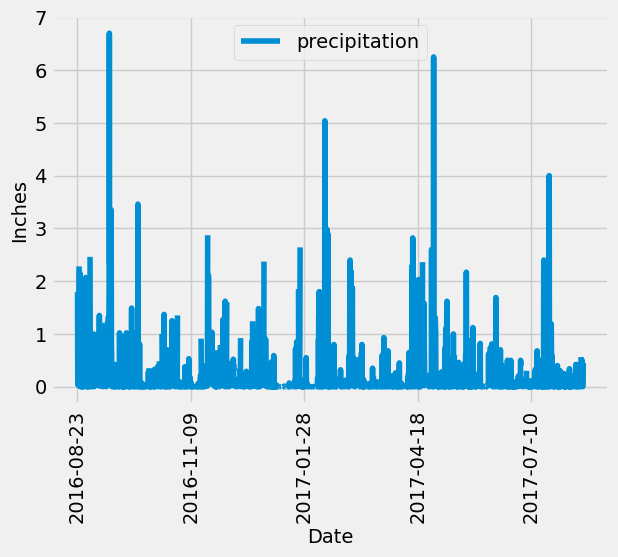

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_date = dt.datetime.strptime(first_date[0], '%Y-%m-%d').date() - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
new_data = session.query(measurement_table.date,measurement_table.prcp).filter(measurement_table.date >= last_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
new_df = pd.DataFrame(new_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
df_date = new_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
fig = df_date.plot(x ='date')
plt.xticks(rotation="vertical")
fig.set_xlabel('Date')
fig.set_ylabel('Inches')
plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summarys = df_date.agg({'precipitation':['mean','median','var','std','sem']})
summarys

,precipitation
mean,0.177279
median,0.020000
var,0.212696
std,0.461190
sem,0.010259


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station_table.station).distinct().count()
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(measurement_table.station,func.count(measurement_table.station)).\
                group_by(measurement_table.station).\
                order_by(func.count(measurement_table.station).desc()).all()



In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_temp = session.query(func.min(measurement_table.tobs)).\
            filter(measurement_table.station == most_active[0][0]).scalar()
high_temp = session.query(func.max(measurement_table.tobs)).\
            filter(measurement_table.station == most_active[0][0]).scalar()
avg_temp = session.query(func.round(func.avg(measurement_table.tobs)),2).\
            filter(measurement_table.station == most_active[0][0]).scalar()
print(f'The lowest them is: {low_temp}, the highest temperature is: {high_temp} and the average temperature is {avg_temp}')

The lowest them is: 54.0, the highest temperature is: 85.0 and the average temperature is 72.0


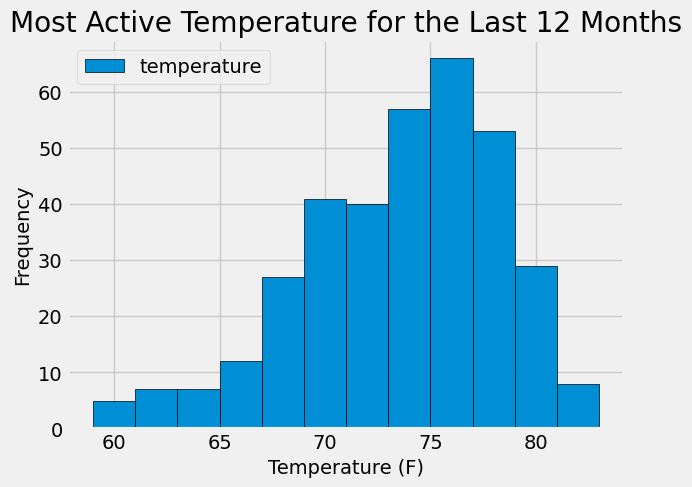

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_q = session.query(measurement_table.tobs,measurement_table.station).\
            filter(measurement_table.station == most_active[0][0]).\
            filter(measurement_table.date >= last_date).all()
station_temps = pd.DataFrame(station_q, columns=['temperature','frequency'])

new_plot = station_temps.plot.hist(y='temperature', bins=12, edgecolor='black')
plt.xlabel('Temperature (F)')
plt.title('Most Active Temperature for the Last 12 Months')
plt.show()

# Close session

In [16]:
# Close Session
session.close()